### Configuring dependencies

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
df = pd.read_parquet(r"C:\Ayub Indra\Data Analyst\DSLS 2023\Mini Project Data Scientist\Datasets\final\final dataset.parquet")

In [5]:
df

,time,street,level,median_length,median_delay,median_speed_kmh,geometry
0,2022-07-06 00:00:00,Pahlawan,2,784.0,62.0,20.310001,"MULTILINESTRING ((106.797269 -6.608899, 106.79..."
1,2022-07-06 00:00:00,Tol Lingkar Luar Bogor,2,1314.0,63.0,37.710000,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
2,2022-07-06 00:00:00,N8 Jalan Raya Sukabumi,3,379.0,117.5,8.594999,"MULTILINESTRING ((106.845486 -6.6594, 106.8454..."
3,2022-07-06 01:00:00,N9 Jalan Raya Pajajaran,2,808.0,73.0,19.920000,"LINESTRING (106.804346 -6.595963, 106.80472 -6..."
4,2022-07-06 01:00:00,Tol Lingkar Luar Bogor,1,2812.0,128.5,43.400000,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
...,...,...,...,...,...,...,...
50664,2022-09-04 23:00:00,Kapten Yusuf,3,402.0,106.0,9.080000,"MULTILINESTRING ((106.787318 -6.614671, 106.78..."
50665,2022-09-06 00:00:00,N9 KS Tubun,2,327.0,67.0,9.620000,"MULTILINESTRING ((106.810069 -6.56609, 106.809..."
50666,2022-09-06 00:00:00,Tol Jagorawi,2,3377.0,116.0,39.030000,"LINESTRING (106.831594 -6.604101, 106.831608 -..."
50667,2022-09-06 00:00:00,N9 Jalan Raya Tajur,1,2625.0,107.5,29.235000,"LINESTRING (106.83008 -6.637004, 106.831101 -6..."


### EDA Overview

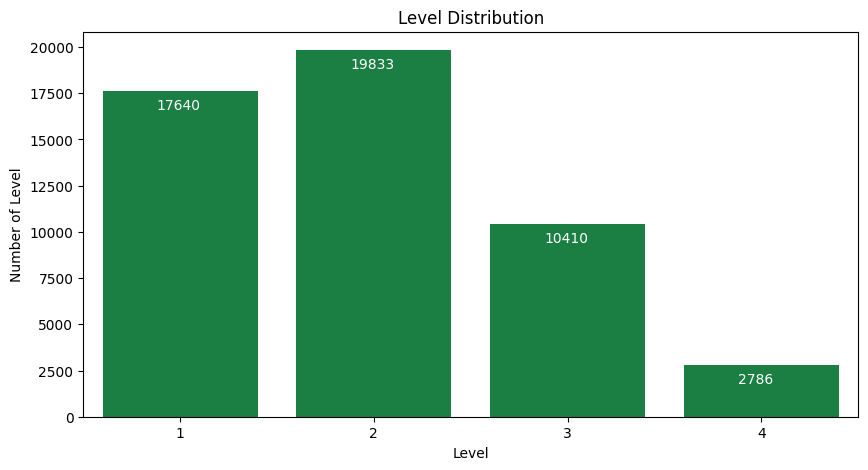

In [6]:
# Level distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='level', data=df, color='#0a9040')
x_offset = -0.12
y_offset = -1000
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0) 
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), color='white')

plt.ylabel('Number of Level')
plt.xlabel('Level')
plt.title("Level Distribution")
plt.show()

<Figure size 1000x300 with 0 Axes>

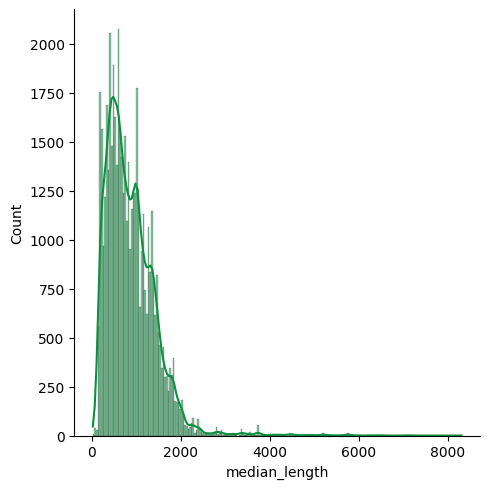

<Figure size 1000x300 with 0 Axes>

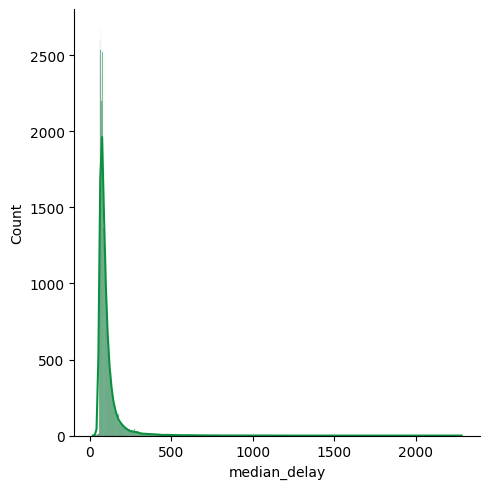

<Figure size 1000x300 with 0 Axes>

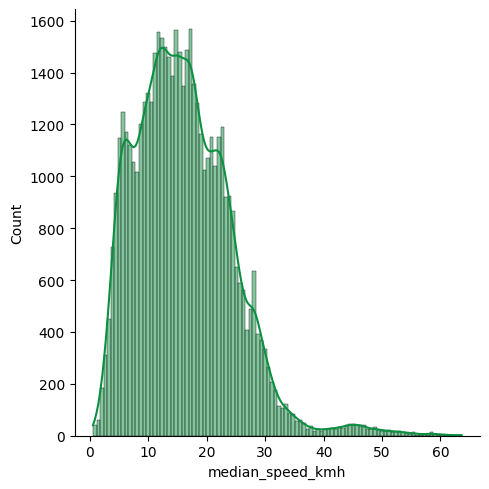

In [7]:
# Check distribution of numeric variable
numeric = ['median_length', 'median_delay', 'median_speed_kmh']

for c in numeric:
    plt.figure(figsize=(10,3))
    sns.displot(x=c, data=df, kde=True, color='#0a9040')
    plt.show()

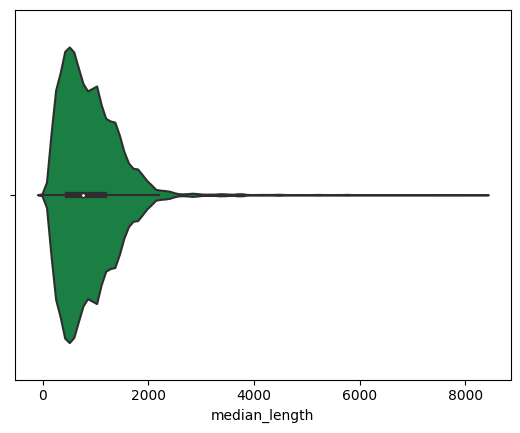

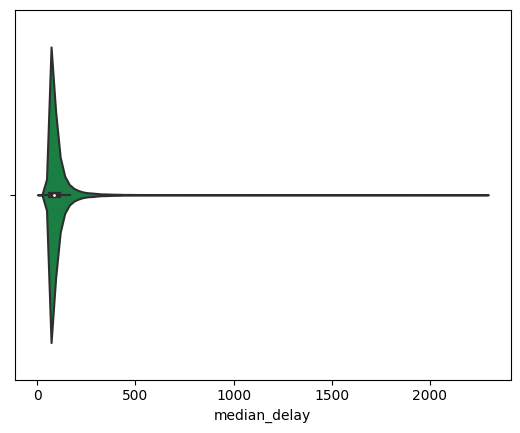

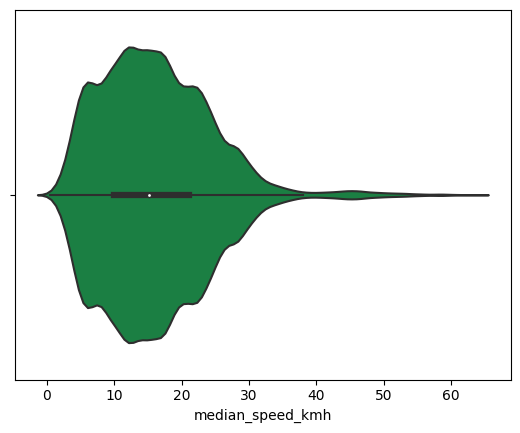

In [8]:
# Check distribution of numeric variable
for c in numeric:
    sns.violinplot(x=c, data=df, color='#0a9040')
    plt.show()

In [33]:
# Street records
street_count = df.groupby('street').size().to_frame(name='total').sort_values(by='total',ascending=False).reset_index()
street_count

,street,total
0,N9 Jalan Raya Pajajaran,1187
1,N9 Raden KH Abdullah bin Nuh,1121
2,N9 Jalan Raya Tajur,1086
3,N9 Jalan Raya Dramaga,1067
4,N8 Jalan Raya Bogor,1062
...,...,...
448,Purnawarman Raya,1
449,N9 Letjen Ibrahim Adjie,1
450,Bismarckia,1
451,Green Hills,1


In [10]:
df['day'] = df['time'].dt.day_name()
df['day'] = pd.Categorical(df['day'],
                           categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                           ordered=True)

In [11]:
df

,time,street,level,median_length,median_delay,median_speed_kmh,geometry,day
0,2022-07-06 00:00:00,Pahlawan,2,784.0,62.0,20.310001,"MULTILINESTRING ((106.797269 -6.608899, 106.79...",Wednesday
1,2022-07-06 00:00:00,Tol Lingkar Luar Bogor,2,1314.0,63.0,37.710000,"LINESTRING (106.787027 -6.559782, 106.787701 -...",Wednesday
2,2022-07-06 00:00:00,N8 Jalan Raya Sukabumi,3,379.0,117.5,8.594999,"MULTILINESTRING ((106.845486 -6.6594, 106.8454...",Wednesday
3,2022-07-06 01:00:00,N9 Jalan Raya Pajajaran,2,808.0,73.0,19.920000,"LINESTRING (106.804346 -6.595963, 106.80472 -6...",Wednesday
4,2022-07-06 01:00:00,Tol Lingkar Luar Bogor,1,2812.0,128.5,43.400000,"LINESTRING (106.787027 -6.559782, 106.787701 -...",Wednesday
...,...,...,...,...,...,...,...,...
50664,2022-09-04 23:00:00,Kapten Yusuf,3,402.0,106.0,9.080000,"MULTILINESTRING ((106.787318 -6.614671, 106.78...",Sunday
50665,2022-09-06 00:00:00,N9 KS Tubun,2,327.0,67.0,9.620000,"MULTILINESTRING ((106.810069 -6.56609, 106.809...",Tuesday
50666,2022-09-06 00:00:00,Tol Jagorawi,2,3377.0,116.0,39.030000,"LINESTRING (106.831594 -6.604101, 106.831608 -...",Tuesday
50667,2022-09-06 00:00:00,N9 Jalan Raya Tajur,1,2625.0,107.5,29.235000,"LINESTRING (106.83008 -6.637004, 106.831101 -6...",Tuesday


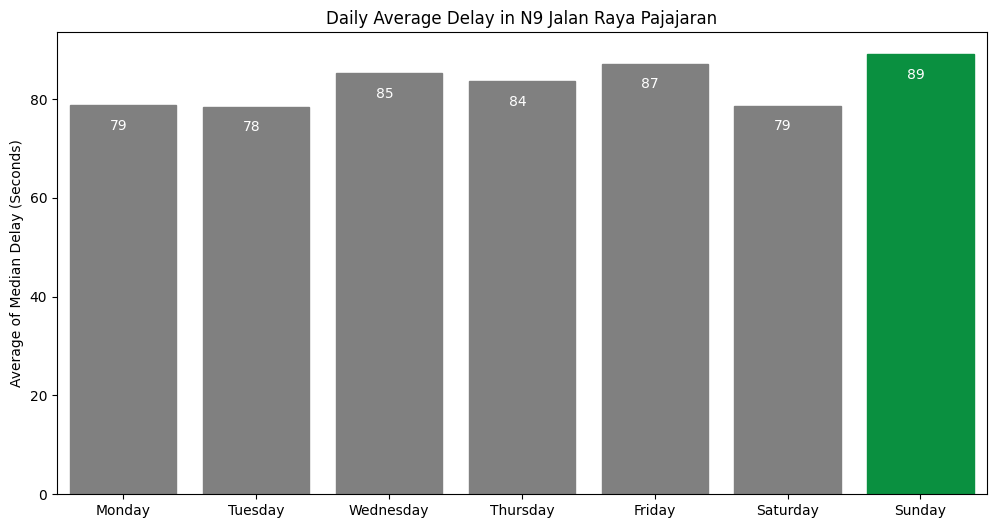

In [31]:
# Median delay daily trends

sample_street = df[df['street'] == 'N9 Jalan Raya Pajajaran']

plt.figure(figsize=(12,6))
ax = sns.barplot(x='day', y='median_delay', data=sample_street, estimator='mean', errorbar=None)
x_offset = -0.1
y_offset = -5
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0) 
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), color='white')
    if p.get_height() > 88:
        p.set_color('#0a9040')
    else:
        p.set_color('grey')

plt.title('Daily Average Delay in N9 Jalan Raya Pajajaran')
plt.ylabel('Average of Median Delay (Seconds)')
plt.xlabel('')
plt.show()

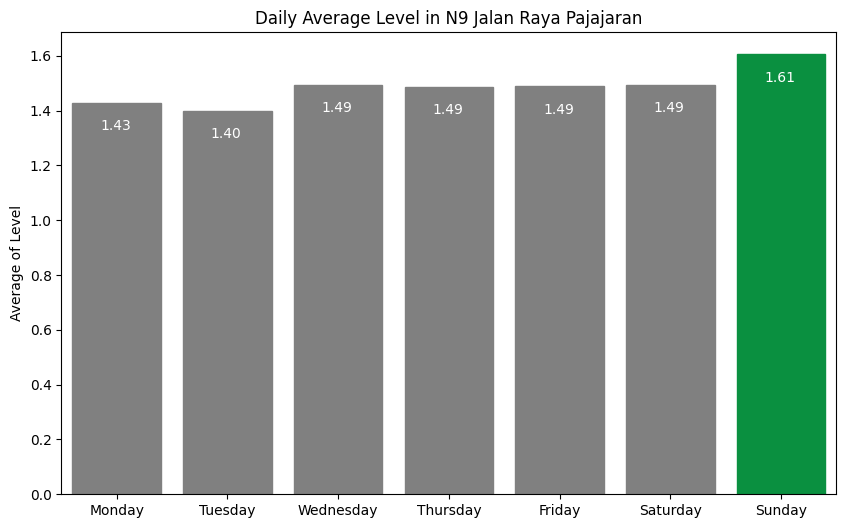

In [13]:
# Level trends

plt.figure(figsize=(10,6))
ax = sns.barplot(x='day', y='level', data=sample_street, estimator='mean', errorbar=None)
x_offset = -0.15
y_offset = -0.1
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0) 
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), color='white')
    if p.get_height() > 1.5:
        p.set_color('#0a9040')
    else:
        p.set_color('grey')

plt.title('Daily Average Level in N9 Jalan Raya Pajajaran')
plt.ylabel('Average of Level')
plt.xlabel('')
plt.show()

In [14]:
# Street with highest delay

top_10_delay = df.groupby('street')['median_delay'].mean().sort_values(ascending=True).nlargest(10).reset_index()
top_10_delay['median_delay'] = np.round(top_10_delay['median_delay'], 0)
top_10_delay

,street,median_delay
0,Cilendek Timur,1426.0
1,Perum Sindang Barang,766.0
2,Waliwis,669.0
3,Cimanggu Lamping,419.0
4,Cemplang Baru Utama,354.0
5,Dekeng Lama,352.0
6,Rumah Sakit 1,327.0
7,Bojongkerta Rancamaya,321.0
8,Bakom,302.0
9,Gang Ace,284.0


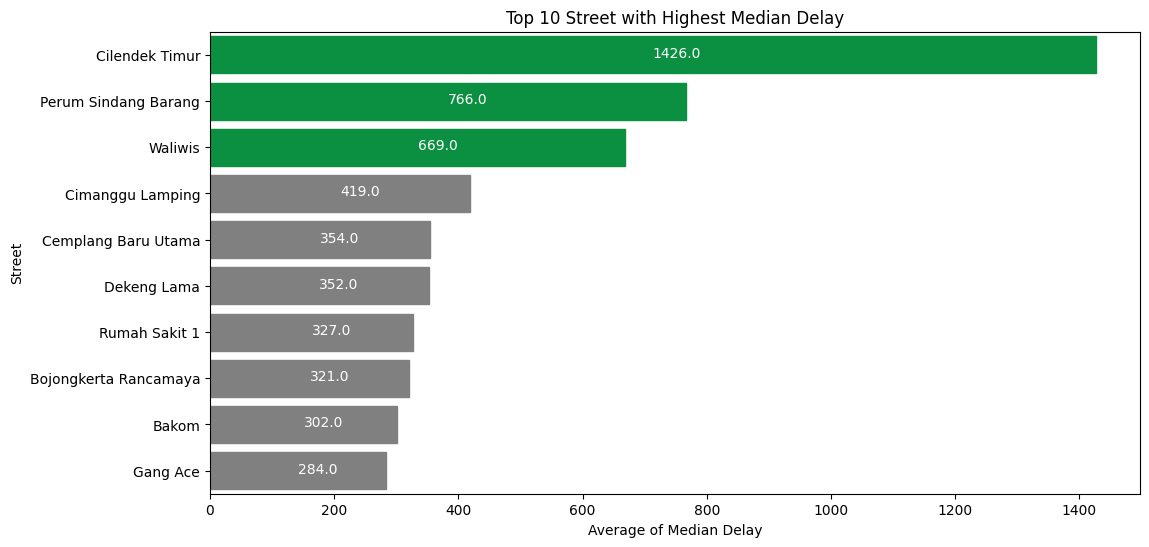

In [29]:
plt.figure(figsize=(12,6))
# pal = sns.color_palette("Greens_d", len(top_10_delay))
ax=sns.barplot(x='median_delay', y='street', estimator='mean', data=top_10_delay, color='#0a9040')

x_offset = 0.1
y_offset = -0.35
for p in ax.patches:
    b = p.get_bbox()
    val = p.get_width()
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), color='white')
    if p.get_width() > 600:
        p.set_color('#0a9040')
    else:
        p.set_color('grey')

plt.title('Top 10 Street with Highest Median Delay')
plt.xlabel('Average of Median Delay')
plt.ylabel('Street')
plt.show()

Text(0.5, 1.0, 'Correlation of Numerical Variable')

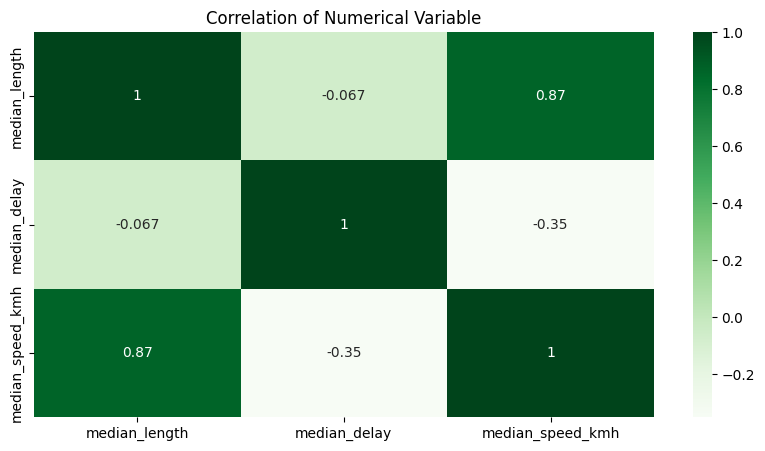

In [39]:
# Correlation
plt.figure(figsize=(10,5))
sns.heatmap(df[numeric].corr(), annot=True, cmap='Greens')
plt.title('Correlation of Numerical Variable')